In [1]:
from keras.applications.vgg19 import VGG19

from keras import layers, models
from tensorflow.keras import datasets

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import keras

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, y_test = x_train / 255.0, y_test / 255.0

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [4]:
# Transforming labels to correct format, through one-hot coding

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_val.shape, y_test.shape

((35000, 10), (15000, 10), (10000, 10))

In [5]:
vgg = VGG19(include_top=False,weights="imagenet",input_shape=(32,32,3))
# vgg = VGG19(
#     include_top=False,
#     weights='imagenet',
#     input_tensor=upscale,
#     input_shape=(244,244,3),
#     pooling='max',
#     classifier_activation='softmax'
# )

vgg.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [8]:
# image_size = (224, 224)
from tensorflow.keras.regularizers import l2

model = Sequential()


# model.add(tf.keras.layers.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]))

for layer in vgg.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(.3))
model.add(Dense(128))
# model.add(Dense(64))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [10]:
hist = model.fit(x_train,y_train,validation_split=0.3,epochs=100,batch_size=256)

Epoch 1/100
96/96 [==============================] - 18s 76ms/step - loss: 2.3039 - accuracy: 0.3963 - val_loss: 1.8480 - val_accuracy: 0.5021
Epoch 2/100
96/96 [==============================] - 6s 61ms/step - loss: 1.7154 - accuracy: 0.5100 - val_loss: 1.5843 - val_accuracy: 0.5269
Epoch 3/100
96/96 [==============================] - 6s 60ms/step - loss: 1.5157 - accuracy: 0.5349 - val_loss: 1.4632 - val_accuracy: 0.5398
Epoch 4/100
96/96 [==============================] - 5s 48ms/step - loss: 1.4061 - accuracy: 0.5510 - val_loss: 1.3880 - val_accuracy: 0.5499
Epoch 5/100
96/96 [==============================] - 6s 60ms/step - loss: 1.3451 - accuracy: 0.5595 - val_loss: 1.3440 - val_accuracy: 0.5528
Epoch 6/100
96/96 [==============================] - 6s 61ms/step - loss: 1.3076 - accuracy: 0.5633 - val_loss: 1.3301 - val_accuracy: 0.5500
Epoch 7/100
96/96 [==============================] - 5s 49ms/step - loss: 1.2763 - accuracy: 0.5704 - val_loss: 1.2919 - val_accuracy: 0.5633
Epoch

In [25]:
loss_test, accuracy_test = model.evaluate(x_test, y_test, verbose=2)
print("Evaluate on test data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for test data: {:.2f}%".format(accuracy_test))
print("Loss for test data : {:.2f}%".format(loss_test))

313/313 - 3s - loss: 180.8228 - accuracy: 0.3140 - 3s/epoch - 10ms/step
Evaluate on test data, optimizer: adam, loss: categorical_crossentropy
Accuracy for test data: 0.31%
Loss for test data : 180.82%


In [26]:
loss_val, accuracy_val = model.evaluate(x_val, y_val, verbose=2)
print("Evaluate on test data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for valid. data: {:.2f}%".format(loss_val))
print("Loss for valid. data : {:.2f}%".format(accuracy_val))

469/469 - 5s - loss: 1.2566 - accuracy: 0.5617 - 5s/epoch - 11ms/step
Evaluate on test data, optimizer: adam, loss: categorical_crossentropy
Accuracy for valid. data: 1.26%
Loss for valid. data : 0.56%


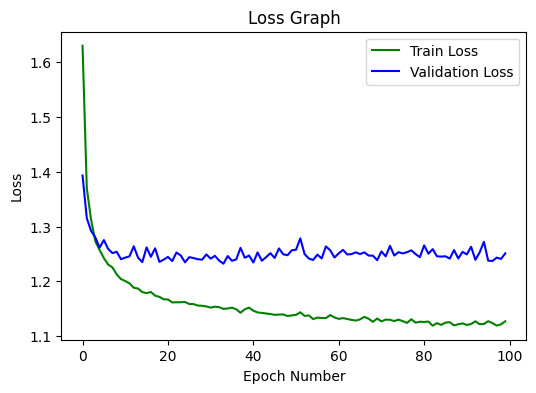

In [27]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

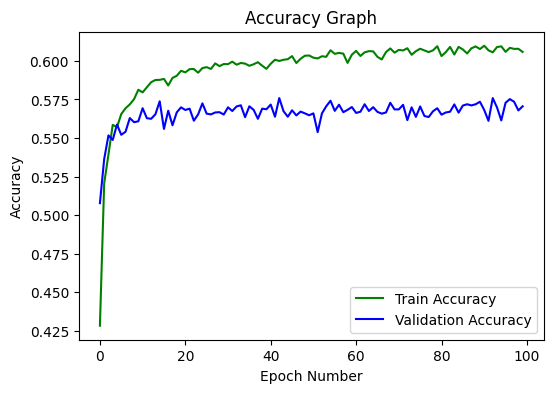

In [28]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()